# Week1授業前課題1 Pythonを使ってみよう

## 【問題１】べき乗の算術演算子を使用して作成
べき乗の算術演算子を使用したプログラムを作ってください。 
雛形として紙を1回折った時の厚さを計算するコードを用意しました。これを43回折った時のコードに書き換えてください。

In [1]:
t_0 = 0.00008   
t_exp = t_0 * 2 ** 43
print("厚さ： {}メートル".format(t_exp))

厚さ： 703687441.77664メートル


## 【問題2】単位の変換
単位がメートルだと実感が湧きづらいので、**◯◯万キロメートル**に変換して表示させてください。

In [2]:
print("厚さ： {:.2f}万キロメートル".format(t_exp/10000000))

厚さ： 70.37万キロメートル


## 【問題3】for文を使用して作成
次に、for文を使用したプログラムを作ってください。
べき乗の算術演算子は使ってはいけません。算術演算子は四則演算（＋、-、×、/）のみ使えます。

**《ヒント》**
べき乗は以下のように掛け算の繰り返しに置き換えることができます。

$$
2^3 = 2*2*2 \\ 2^5 = 2*2*2*2*2
$$

In [3]:
t_for = t_0            

for i in range(43):    
  t_for *= 2

print("厚さ： {}メートル".format(t_for))

厚さ： 703687441.77664メートル


## 【問題4】計算時間の比較
2つの方法はどちらが正しいわけでもありませんが、コードの良さを評価する際には以下のような着目点があります。

- 計算速度
- メモリの使用量
- 可読性
- 拡張性
- 再利用性

今回は計算速度を比較してみます。以下の雛形を使用して、2つの方法の計算時間を出力してください。そして、それぞれの計算時間の関係を簡単に説明してください。どちらの書き方が良さそうでしょうか。なお、変数の定義やprint文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください。

timeモジュールを用いることで現在の時間を取得できます。比較したい箇所の前後の時間の差を計算することで、実行時間を求めます。

In [13]:
t_for = t_0

import time
start = time.time()
t_exp = t_0 * 2 ** 43
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

start = time.time()
for i in range(10000):
  t_for *= 2
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 0.00010514259338378906[s]
time : 0.0015382766723632812[s]


計算方法の計算時間の違いについては、べき乗の場合、計算が１度のみであり（t^43またはt^n）、for文の場合は43回（またはn回）繰り返されるため、計算時間はfor文の方が長い。43回では計算時間に大きな違いは見られないが、nが大きくなるにつれ、その差は顕著になる。ただしべき乗計算はn値が大きすぎるとfloat変換できず、overflow errorを起こすため、その場合はfor文計算を使用すべきと考えられる。

## 【問題5】リストへの保存
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。

**《ヒント》**

- 空のリストを作成する。
- 折る前の値をリストに追加する。
- for文の中でn回折った時の値をリストに追加していく。

最終的にリストに44個の値が格納されていることをlen関数を用いて確認しておきましょう。

In [14]:
t_for = t_0
thickness = [t_0]

for i in range(43):
  t_for *= 2
  thickness.append(t_for)
print(len(thickness))

44


## 【問題6】折れ線グラフの表示
グラフの描画には**Matplotlib**という**ライブラリ**を用います。
グラフを表示させた場合はそれに対する考察が重要です。厚さがどのように変化しているかを簡単に説明してください。

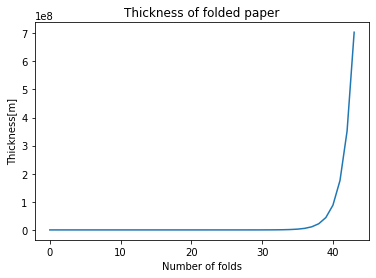

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.title("Thickness of folded paper")
plt.xlabel("Number of folds")
plt.ylabel("Thickness[m]")
plt.plot(thickness)
plt.show()

グラフは基本的な指数曲線を描いており、約40回紙を折り曲げた時点で急激に厚みの値が上昇する。

## 【問題7】グラフのカスタマイズ
グラフをより見やすくカスタマイズしてみましょう。カスタマイズしたグラフを最低3種類作成してください。

### カスタマイズ①　マーカーの追加

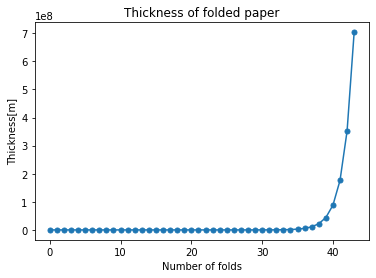

In [10]:
%matplotlib inline
plt.title("Thickness of folded paper")
plt.xlabel("Number of folds")
plt.ylabel("Thickness[m]")
plt.plot(thickness,marker='o',markersize='5')
plt.show()

### カスタマイズ②　点線に変更（マーカーと線を区別するため）

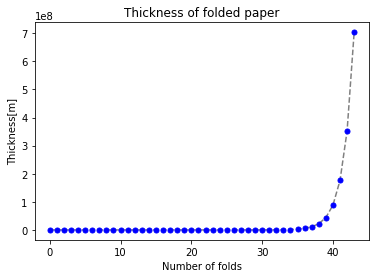

In [11]:
%matplotlib inline
plt.title("Thickness of folded paper")
plt.xlabel("Number of folds")
plt.ylabel("Thickness[m]")
plt.plot(thickness,marker='o',markersize='5',ls='--',c ='gray',mfc='b',mec='b')
plt.show()

### カスタマイズ③　グリッド線追加＋軸ラベルのフォント拡大

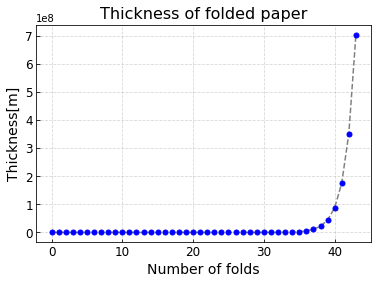

In [12]:
%matplotlib inline
plt.title("Thickness of folded paper",fontsize=16)
plt.xlabel("Number of folds",fontsize=14)
plt.ylabel("Thickness[m]",fontsize=14)
plt.plot(thickness,marker='o',markersize='5',ls='--',c ='gray',mfc='b',mec='b')
plt.tick_params(labelsize=12,direction = 'in')
plt.grid(ls='--',alpha=0.5)
plt.show()